In [189]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
df = pd.read_csv('datasets\IT Salary Survey EU  2020.csv')

<>:1: SyntaxWarning: invalid escape sequence '\I'
<>:1: SyntaxWarning: invalid escape sequence '\I'
C:\Users\imoce\AppData\Local\Temp\ipykernel_18444\3612942028.py:1: SyntaxWarning: invalid escape sequence '\I'
  df = pd.read_csv('datasets\IT Salary Survey EU  2020.csv')


In [191]:
df.head()

,Timestamp,Age,Gender,City,Position,Total years of experience,Years of experience in Germany,Seniority level,Your main technology / programming language,Other technologies/programming languages you use often,...,Annual bonus+stocks one year ago. Only answer if staying in same country,Number of vacation days,Employment status,Сontract duration,Main language at work,Company size,Company type,Have you lost your job due to the coronavirus outbreak?,"Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week","Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR"
0,24/11/2020 11:14:15,26.0,Male,Munich,Software Engineer,5,3,Senior,TypeScript,"Kotlin, Javascript / Typescript",...,10000,30,Full-time employee,Unlimited contract,English,51-100,Product,No,NaN,NaN
1,24/11/2020 11:14:16,26.0,Male,Berlin,Backend Developer,7,4,Senior,Ruby,NaN,...,5000,28,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN
2,24/11/2020 11:14:21,29.0,Male,Berlin,Software Engineer,12,6,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",...,100000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,Yes,NaN,NaN
3,24/11/2020 11:15:24,28.0,Male,Berlin,Frontend Developer,4,1,Junior,Javascript,NaN,...,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup,No,NaN,NaN
4,24/11/2020 11:15:46,37.0,Male,Berlin,Backend Developer,17,6,Senior,C# .NET,".NET, SQL, AWS, Docker",...,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product,No,NaN,NaN


In [192]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'City', 'Position ',
       'Total years of experience', 'Years of experience in Germany',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR',
       'Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country',
       'Annual bonus+stocks one year ago. Only answer if staying in same country',
       'Number of vacation days', 'Employment status', 'Сontract duration',
       'Main language at work', 'Company size', 'Company type',
       'Have you lost your job due to the coronavirus outbreak?',
       'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week',
       'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 20

In [193]:
df = df.drop(columns=['Years of experience in Germany',  
                 'Annual bonus+stocks one year ago. Only answer if staying in same country', 
                 'Have you lost your job due to the coronavirus outbreak?',
                 'Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week', 
                 'Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR', 
                 'Years of experience in Germany',
                 'Timestamp'])

In [194]:
df = df.drop(columns=['Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country'])

In [195]:
df.columns

Index(['Age', 'Gender', 'City', 'Position ', 'Total years of experience',
       'Seniority level', 'Your main technology / programming language',
       'Other technologies/programming languages you use often',
       'Yearly brutto salary (without bonus and stocks) in EUR',
       'Yearly bonus + stocks in EUR', 'Number of vacation days',
       'Employment status', 'Сontract duration', 'Main language at work',
       'Company size', 'Company type'],
      dtype='object')

In [196]:
df = df.rename(columns={'Your main technology / programming language': 'Main Technology',
                        'Yearly brutto salary (without bonus and stocks) in EUR': 'Yearly salary',
                         'Yearly bonus + stocks in EUR': 'Yearly bonus',
                         'Number of vacation days': 'Days of vacation',
                         'Other technologies/programming languages you use often': 'Other technologies',
                         'Main language at work': 'Language at work'})

In [197]:
df.head(15)

,Age,Gender,City,Position,Total years of experience,Seniority level,Main Technology,Other technologies,Yearly salary,Yearly bonus,Days of vacation,Employment status,Сontract duration,Language at work,Company size,Company type
0,26.0,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
1,26.0,Male,Berlin,Backend Developer,7,Senior,Ruby,NaN,80000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
2,29.0,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
3,28.0,Male,Berlin,Frontend Developer,4,Junior,Javascript,NaN,54000.0,NaN,24,Full-time employee,Unlimited contract,English,51-100,Startup
4,37.0,Male,Berlin,Backend Developer,17,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,NaN,29,Full-time employee,Unlimited contract,English,101-1000,Product
5,32.0,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup
6,37.0,Male,Berlin,Frontend Developer,6,Middle,Javascript,NaN,57000.0,NaN,24,Full-time employee,Unlimited contract,English,11-50,Product
7,24.0,Male,Berlin,Frontend Developer,5,Senior,Typescript,Javascript / Typescript,65000.0,NaN,27,Full-time employee,Unlimited contract,English,1000+,Product
8,29.0,Male,Berlin,Backend Developer,8,Senior,PHP,"SQL, AWS, Docker",56000.0,NaN,28,Full-time employee,Unlimited contract,English,101-1000,Product
9,35.0,Male,Berlin,Software Engineer,15,Lead,Java,NaN,95000.0,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product


In [198]:
df.dtypes

Age                          float64
Gender                        object
City                          object
Position                      object
Total years of experience     object
Seniority level               object
Main Technology               object
Other technologies            object
Yearly salary                float64
Yearly bonus                  object
Days of vacation              object
Employment status             object
Сontract duration             object
Language at work              object
Company size                  object
Company type                  object
dtype: object

In [199]:
df.isnull().sum()

Age                           27
Gender                        10
City                           0
Position                       6
Total years of experience     16
Seniority level               12
Main Technology              127
Other technologies           157
Yearly salary                  0
Yearly bonus                 424
Days of vacation              68
Employment status             17
Сontract duration             29
Language at work              16
Company size                  18
Company type                  25
dtype: int64

In [200]:
df['Age'] = df['Age'].fillna(0).astype(int)
df['Yearly salary'] = df['Yearly salary'].astype(int)


<Axes: xlabel='Age'>

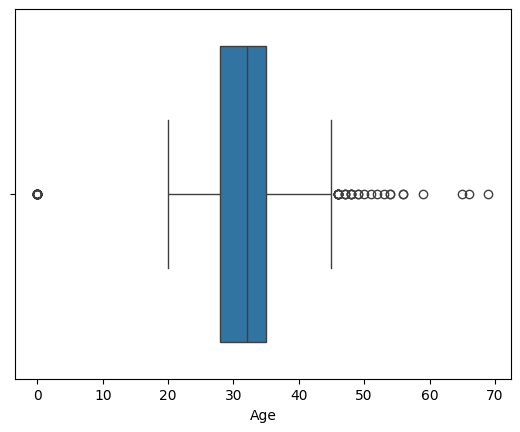

In [201]:
sns.boxplot(data=df, x='Age')

In [202]:
df[df['Age'] == 0]

,Age,Gender,City,Position,Total years of experience,Seniority level,Main Technology,Other technologies,Yearly salary,Yearly bonus,Days of vacation,Employment status,Сontract duration,Language at work,Company size,Company type
11,0,Male,Berlin,Software Engineer,25,Senior,C++,"Python, C/C++, SQL",100000,101,24,Self-employed (freelancer),Temporary contract,English,11-50,Product
12,0,NaN,Berlin,Software Engineer,NaN,Lead,PHP,NaN,90000,40000,NaN,Full-time employee,Unlimited contract,English,1000+,NaN
28,0,Male,Berlin,DevOps,14,Senior,NaN,"Python, Go, AWS, Kubernetes, Docker",67000,7000,30,Full-time employee,Unlimited contract,English,101-1000,Product
55,0,Male,Berlin,Software Engineer,NaN,Senior,PHP,NaN,75000,NaN,NaN,Full-time employee,NaN,English,NaN,NaN
113,0,Male,Berlin,QA Engineer,6,Middle,Javascript,"Javascript / Typescript, AWS",50000,NaN,30,Full-time employee,Unlimited contract,English,101-1000,Product
300,0,Male,Berlin,Data Engineer,7.5,Middle,SQL,"Python, SQL, AWS, Kubernetes, Docker",68000,500,30,Full-time employee,Unlimited contract,English,101-1000,Product
330,0,NaN,Munich,Data Scientist,2,Middle,Python,NaN,54000,NaN,20,Full-time employee,Unlimited contract,English,51-100,Product
340,0,Male,Hamburg,Support Engineer,NaN,Senior,NaN,"Kubernetes, Docker",61000,NaN,28,Full-time employee,Unlimited contract,English,NaN,NaN
365,0,Male,Berlin,Software Engineer,9,Lead,Java,"AWS, Docker",75000,NaN,24,Full-time employee,Unlimited contract,English,1000+,Startup
374,0,Male,Karlsruhe,Backend Developer,8,Lead,Python,"Python, C/C++, Javascript / Typescript, Java /...",65000,5400,29,Part-time employee,Unlimited contract,English,up to 10,Product


In [203]:
df.isnull().sum()

Age                            0
Gender                        10
City                           0
Position                       6
Total years of experience     16
Seniority level               12
Main Technology              127
Other technologies           157
Yearly salary                  0
Yearly bonus                 424
Days of vacation              68
Employment status             17
Сontract duration             29
Language at work              16
Company size                  18
Company type                  25
dtype: int64

In [204]:
df['Age'].sort_values()

904      0
1063     0
726      0
829      0
418      0
        ..
1159    56
23      59
296     65
59      66
1103    69
Name: Age, Length: 1253, dtype: int32

In [205]:
drop_index = (df[df['Age'] == 0].index).to_list()

In [206]:
df = df.drop(index=drop_index)

In [207]:
df.isnull().sum()

Age                            0
Gender                         3
City                           0
Position                       2
Total years of experience      8
Seniority level                8
Main Technology              119
Other technologies           149
Yearly salary                  0
Yearly bonus                 409
Days of vacation              59
Employment status             13
Сontract duration             23
Language at work              12
Company size                  10
Company type                  16
dtype: int64

In [208]:
df = df.drop(index=853)

In [209]:
df.isnull().sum()

Age                            0
Gender                         3
City                           0
Position                       2
Total years of experience      8
Seniority level                8
Main Technology              119
Other technologies           148
Yearly salary                  0
Yearly bonus                 409
Days of vacation              59
Employment status             13
Сontract duration             23
Language at work              12
Company size                  10
Company type                  16
dtype: int64

Text(0, 0.5, 'Count')

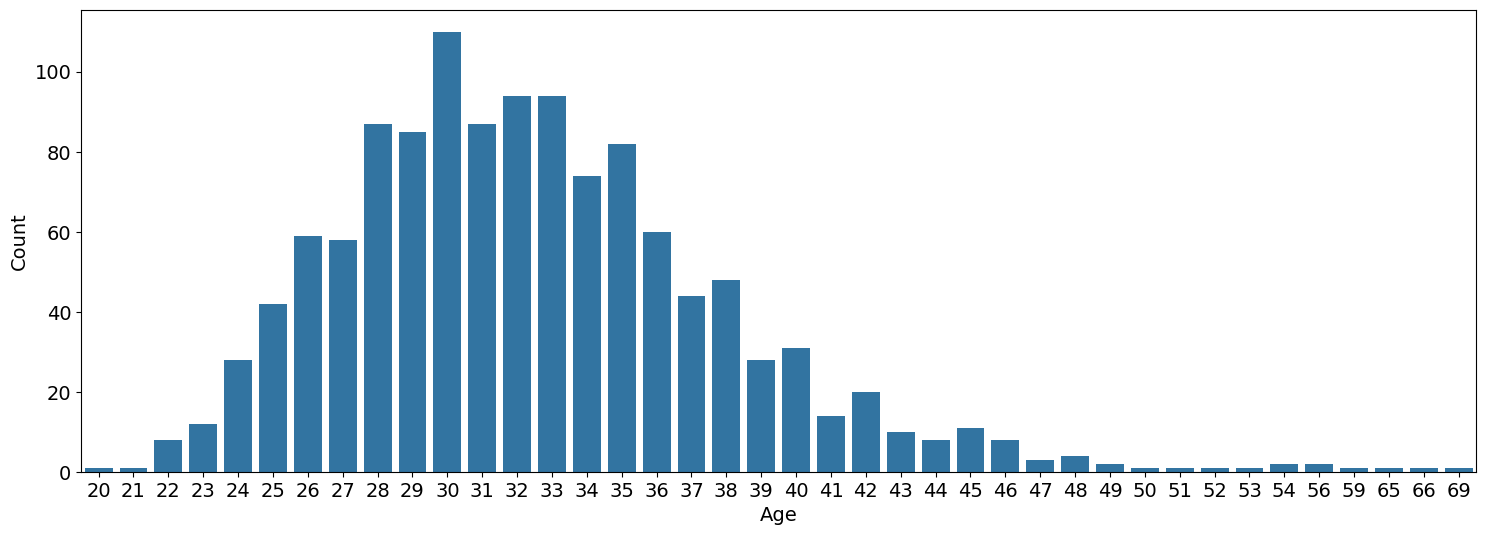

In [210]:
plt.figure(figsize=(18,6))
sns.countplot(data=df, x='Age')
plt.xlabel('Age', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Count', fontsize=14)


In [211]:
df=df.drop(index=778)

In [212]:
df.head()
df = df.dropna()
df

,Age,Gender,City,Position,Total years of experience,Seniority level,Main Technology,Other technologies,Yearly salary,Yearly bonus,Days of vacation,Employment status,Сontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
2,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
5,32,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup
19,34,Male,Berlin,Mobile Developer,11,Lead,kotlin,"Kotlin, Javascript / Typescript, AWS, Google C...",80000,80000,28,Full-time employee,Unlimited contract,English,101-1000,Product
25,38,Male,Berlin,Team Lead,18,Lead,iOS,"Swift, AWS",80000,4000,28,Full-time employee,Unlimited contract,English,101-1000,Product
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,32,Male,Munich,Software Engineer,10,Head,Scala,"Javascript / Typescript, Java / Scala, SQL, Go...",95000,0,24,Full-time employee,Unlimited contract,English,11-50,Startup
1248,31,Male,Berlin,Backend Developer,9,Senior,Java,"Python, Javascript / Typescript, Java / Scala,...",70000,72000,26,Full-time employee,Unlimited contract,English,51-100,Product
1250,39,Male,Munich,IT Operations Manager,15,Lead,PHP,"Python, C/C++, Javascript / Typescript, Java /...",110000,0,28,Full-time employee,Unlimited contract,English,101-1000,eCommerce
1251,26,Male,Saarbrücken,Frontend Developer,7,Middle,JavaScript,"Javascript / Typescript, Docker, HTML, CSS; Ad...",38350,40950,27,Full-time employee,Unlimited contract,German,101-1000,Product


<Axes: xlabel='Gender', ylabel='Age'>

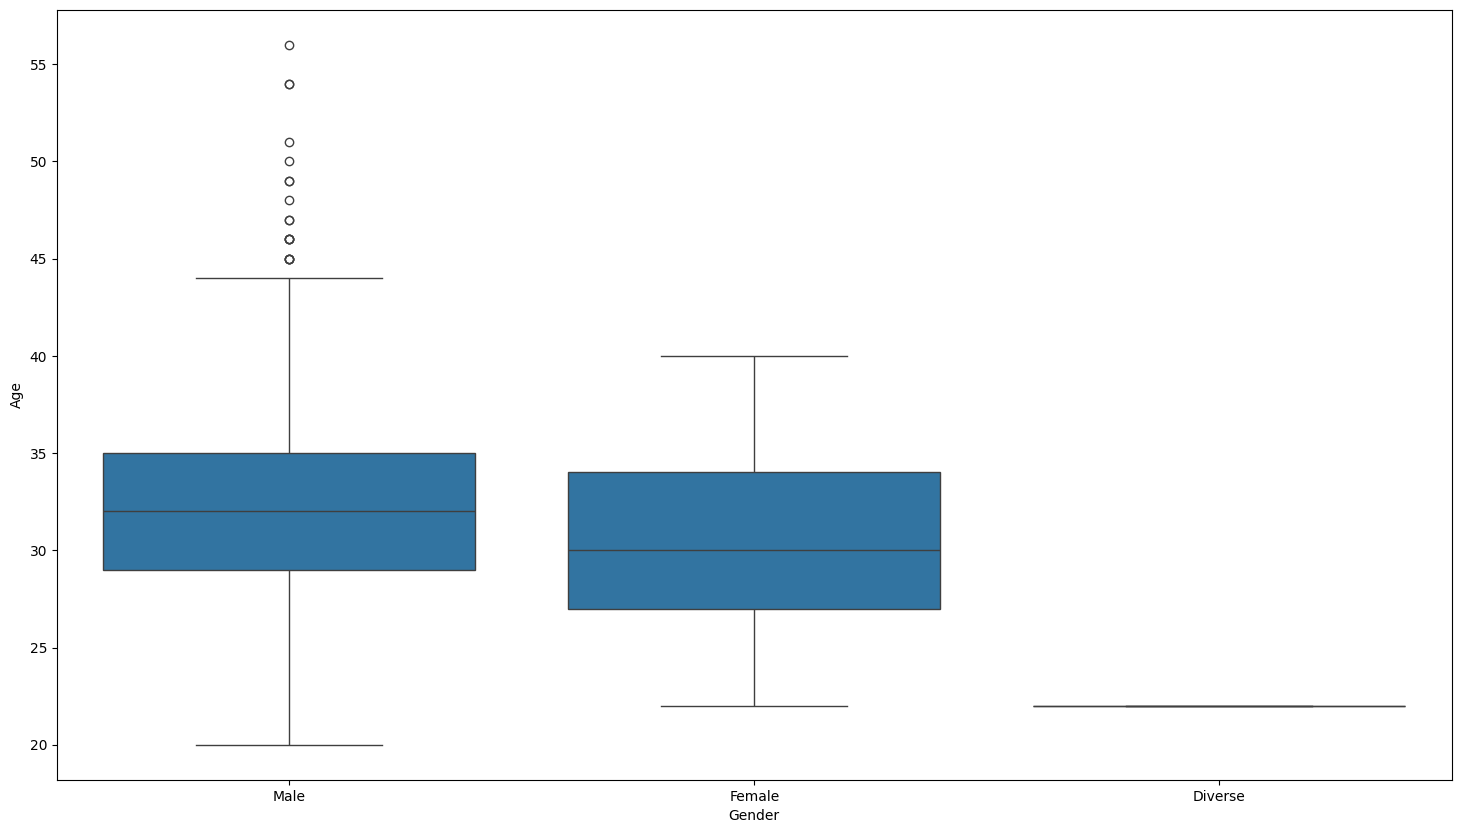

In [213]:
plt.figure(figsize=(18,10))
sns.boxplot(data=df, x='Gender', y='Age')

In [214]:
df['Main Technology'].unique()

array(['TypeScript', 'Javascript / Typescript', 'AWS, GCP, Python,K8s',
       'kotlin', 'iOS', 'Kubernetes', 'Go', 'Python', 'React', 'Java',
       'С#', 'Php', '.NET', 'C#', 'JavaScript ', 'python', 'VHDL',
       'Power BI', 'Swift', 'ML', 'C++', 'SQL', 'PHP', 'Ml/Python',
       'C#, .net core', 'Javascript', 'JavaScript/TypeScript', 'php',
       'Ruby', 'Azure, SAP', 'Scala', 'JavaScript', 'Java, JavaScript',
       'Python ', 'Agile', 'TypeScript, JavaScript',
       'Pegasystems platform ', 'Cloud', 'SWIFT', 'Java, angular, Aws',
       'Swift, objective-c', '.net', 'Node.js', 'R', 'Bash', 'nothing',
       'Qlik BI Tool, SQL', 'Blockchain', 'Android', 'go', 'c++',
       'Java, terraform', 'Oracle', 'Javascript ', 'Angular, React',
       'Kotlin', 'Elixir', 'NodeJS, Typescript, AWS', 'Java, JS',
       'Objective-C', 'QA', 'C++/C#', 'ABAP', 'React/Typescript',
       'javascript', 'Java/C++', 'Scala / Python', 'C', 'Web developer',
       'JavaScript/Typescript', 'TypeScript

In [215]:
df = df.replace(['javascript', 'Javascript', 'js', 'JS'], 'JavaScript')
df = df.replace(['Typescript', 'typescript'], 'TypeScript')
df = df.replace(['python', 'Python '], 'Python')
df = df.replace('c++', 'C++')
df = df.replace(['.net', '.Net'], '.NET')
df = df.replace(['Sql', 'sql'], 'SQL')
df = df.replace(['php','Php'], 'PHP')
df = df.replace('java', 'Java')


In [216]:
df['Main Technology'].unique()

array(['TypeScript', 'Javascript / Typescript', 'AWS, GCP, Python,K8s',
       'kotlin', 'iOS', 'Kubernetes', 'Go', 'Python', 'React', 'Java',
       'С#', 'PHP', '.NET', 'C#', 'JavaScript ', 'VHDL', 'Power BI',
       'Swift', 'ML', 'C++', 'SQL', 'Ml/Python', 'C#, .net core',
       'JavaScript', 'JavaScript/TypeScript', 'Ruby', 'Azure, SAP',
       'Scala', 'Java, JavaScript', 'Agile', 'TypeScript, JavaScript',
       'Pegasystems platform ', 'Cloud', 'SWIFT', 'Java, angular, Aws',
       'Swift, objective-c', 'Node.js', 'R', 'Bash', 'nothing',
       'Qlik BI Tool, SQL', 'Blockchain', 'Android', 'go',
       'Java, terraform', 'Oracle', 'Javascript ', 'Angular, React',
       'Kotlin', 'Elixir', 'NodeJS, Typescript, AWS', 'Java, JS',
       'Objective-C', 'QA', 'C++/C#', 'ABAP', 'React/Typescript',
       'Java/C++', 'Scala / Python', 'C', 'Web developer',
       'JavaScript/Typescript', 'TypeScript, React',
       'Python / JavaScript (React)', 'Terraform', 'JAVA', 'Apache Spark',


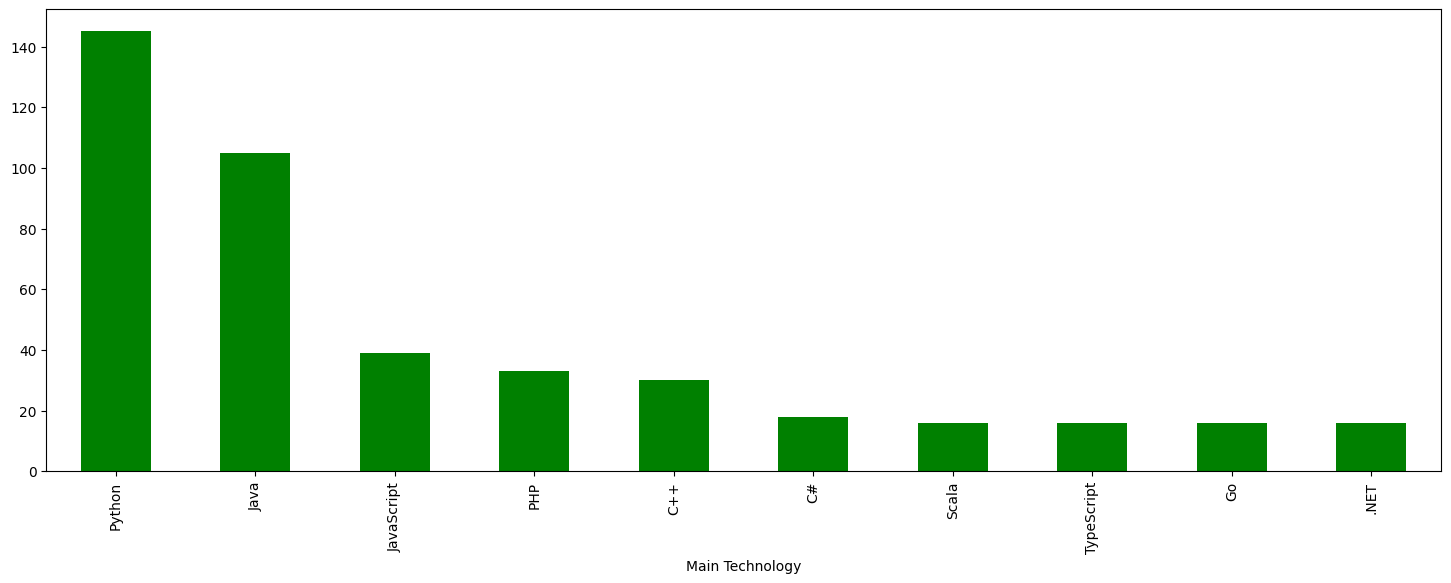

In [217]:
plt.figure(figsize=(18,6))
ax = df['Main Technology'].value_counts().head(10).plot(kind='bar', color='green')

In [218]:
df.head()

,Age,Gender,City,Position,Total years of experience,Seniority level,Main Technology,Other technologies,Yearly salary,Yearly bonus,Days of vacation,Employment status,Сontract duration,Language at work,Company size,Company type
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,5000,30,Full-time employee,Unlimited contract,English,51-100,Product
2,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product
5,32,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup
19,34,Male,Berlin,Mobile Developer,11,Lead,kotlin,"Kotlin, Javascript / Typescript, AWS, Google C...",80000,80000,28,Full-time employee,Unlimited contract,English,101-1000,Product
25,38,Male,Berlin,Team Lead,18,Lead,iOS,"Swift, AWS",80000,4000,28,Full-time employee,Unlimited contract,English,101-1000,Product


In [231]:
df[df['Yearly bonus'].isin(['depends', 'Na', 'bvg only', '15000+-', '-', 'Not sure'])]

df.loc[[718,959,472,804, 1052, 1157], 'Yearly bonus'] = [0,0,0,15000, 0, 0]




df['Salary + Bonus'] = df['Yearly salary'] + df['Yearly bonus'].astype(float)


In [232]:
df = df.rename(columns={'Total years of experience': 'Experience'})

In [233]:
df[df['Experience']== '1 (as QA Engineer) / 11 in total']

df.loc[805, 'Experience'] = 11

df[df['Experience'] == 'less than year']

df.loc[1209, 'Experience'] = 0.5


In [234]:
df.head()

,Age,Gender,City,Position,Experience,Seniority level,Main Technology,Other technologies,Yearly salary,Yearly bonus,Days of vacation,Employment status,Сontract duration,Language at work,Company size,Company type,Salary + Bonus
0,26,Male,Munich,Software Engineer,5,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000,5000,30,Full-time employee,Unlimited contract,English,51-100,Product,85000.0
2,29,Male,Berlin,Software Engineer,12,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000,120000,30,Self-employed (freelancer),Temporary contract,English,101-1000,Product,240000.0
5,32,Male,Berlin,DevOps,5,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000,5000,30,Full-time employee,Unlimited contract,English,11-50,Startup,81000.0
19,34,Male,Berlin,Mobile Developer,11,Lead,kotlin,"Kotlin, Javascript / Typescript, AWS, Google C...",80000,80000,28,Full-time employee,Unlimited contract,English,101-1000,Product,160000.0
25,38,Male,Berlin,Team Lead,18,Lead,iOS,"Swift, AWS",80000,4000,28,Full-time employee,Unlimited contract,English,101-1000,Product,84000.0


In [240]:
df[df['Experience'] == '15, thereof 8 as CTO']
df.loc[855, 'Experience'] = 15
df['Experience'] = df['Experience'].str.replace(',', '.').astype(float)


<Axes: xlabel='Salary + Bonus', ylabel='Experience'>

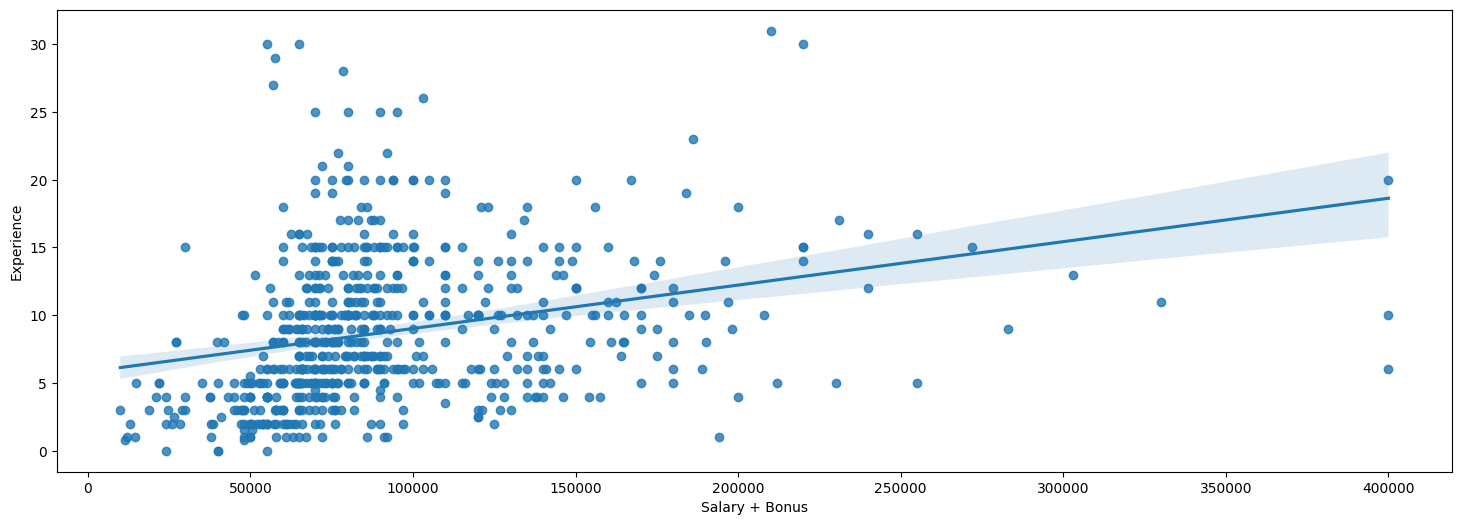

In [241]:
plt.figure(figsize=(18,6))
sns.regplot(data=df, x='Salary + Bonus', y='Experience')

In [242]:
df.dtypes

Age                     int32
Gender                 object
City                   object
Position               object
Experience            float64
Seniority level        object
Main Technology        object
Other technologies     object
Yearly salary           int32
Yearly bonus           object
Days of vacation       object
Employment status      object
Сontract duration      object
Language at work       object
Company size           object
Company type           object
Salary + Bonus        float64
dtype: object

In [243]:
drop_col = ['Gender', 'City','Position ', 'Seniority level', 'Main Technology', 'Other technologies', 'Yearly bonus', 'Days of vacation', 'Employment status', 'Сontract duration', 'Language at work', 'Company size', 'Company type']

dropped_columns = df.drop(columns=drop_col)


In [244]:
dropped_columns

,Age,Experience,Yearly salary,Salary + Bonus
0,26,5.0,80000,85000.0
2,29,12.0,120000,240000.0
5,32,5.0,76000,81000.0
19,34,11.0,80000,160000.0
25,38,18.0,80000,84000.0
...,...,...,...,...
1244,32,10.0,95000,95000.0
1248,31,9.0,70000,142000.0
1250,39,15.0,110000,110000.0
1251,26,7.0,38350,79300.0


<Axes: >

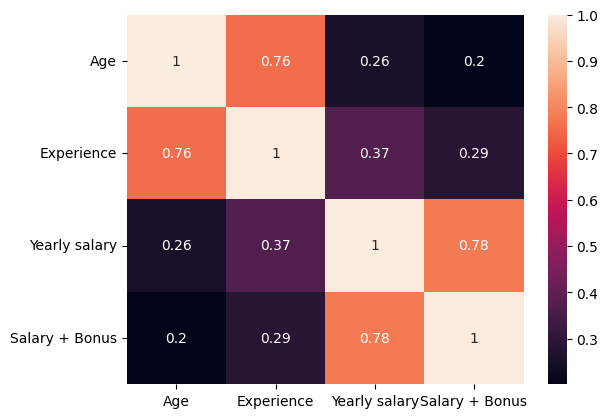

In [245]:
sns.heatmap(dropped_columns.corr(), annot=True)